In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# GPU / MEM

In [2]:
folder = 'tensorrt'
file = 'gpu_mem'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt.csv')[0:300]
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt.csv')[0:300]
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt.csv')[0:300]
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt.csv')[0:300]
# rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt.csv')

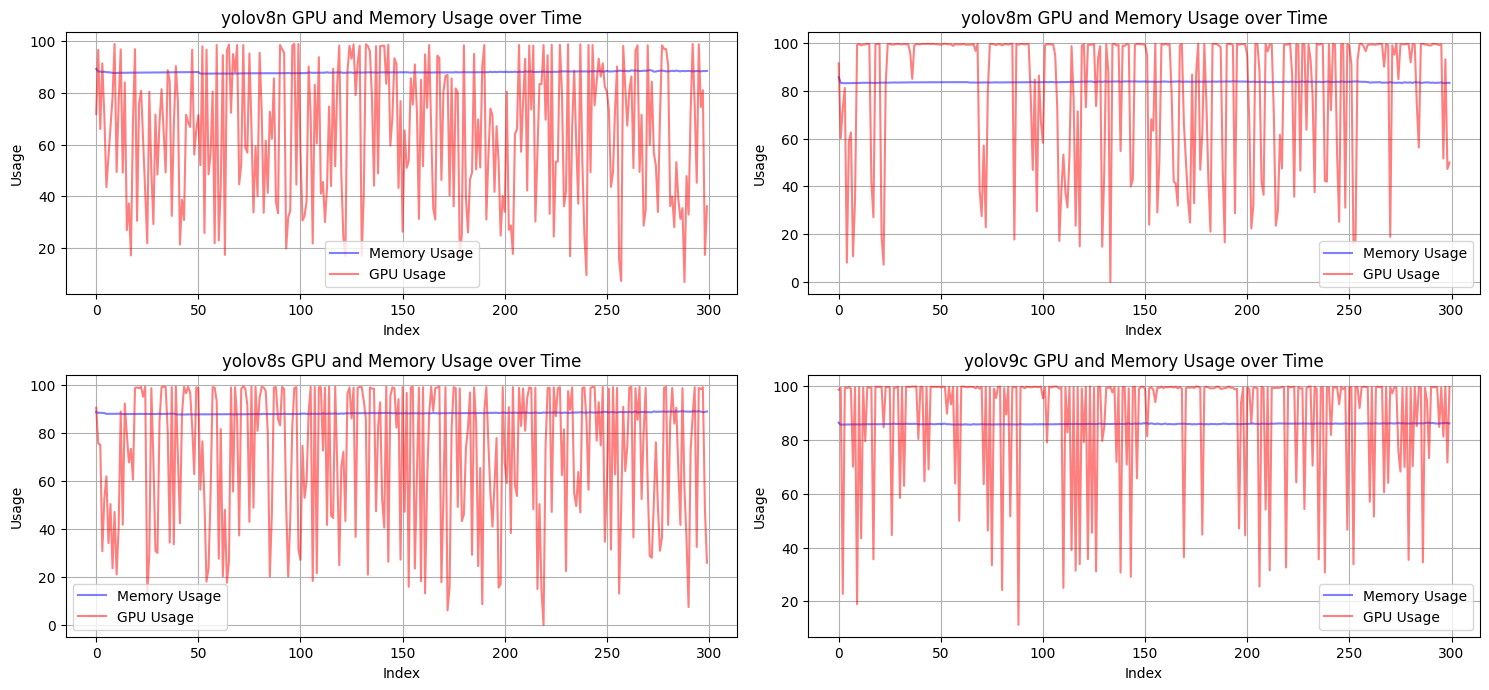

In [3]:

models = [yolov8n, yolov8m, yolov8s, yolov9c]
model_names = ['yolov8n', 'yolov8m', 'yolov8s', 'yolov9c']
# Plot GPU usage and memory usage for each model in subplots
plt.figure(figsize=(15, 10))
for i, model in enumerate(models, 1):
    plt.subplot(3, 2, i)
    plt.plot(model.index, model['mem_usage'], color='blue', label='Memory Usage', alpha=0.5)
    plt.plot(model.index, model['gpu_usage'], color='red', label='GPU Usage', alpha=0.5)
    plt.title(f'{model_names[i-1]} GPU and Memory Usage over Time')
    plt.xlabel('Index')
    plt.ylabel('Usage')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [4]:
# Merge DataFrames
merged_data = yolov8n.merge(yolov8m, on='number', suffixes=('_yolov8n', '_yolov8m')) \
                     .merge(yolov8s, on='number') \
                     .merge(yolov9c, on='number', suffixes=('_yolov8s', '_yolov9c'))
                    #  .merge(rtdetrl, on='number', suffixes=('_yolov8s', '_rtdetrl'))
# merged_data['gpu_usage_rtdetrl'] = merged_data['gpu_usage']
# merged_data['mem_usage_rtdetrl'] = merged_data['mem_usage']
merged_data = merged_data.drop(['number'], axis=1).copy()
merged_data = merged_data[0:300]

In [5]:
selected_columns = merged_data.filter(regex='^gpu_usage').columns
merged_data[selected_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
gpu_usage_yolov8n,300.0,64.625333,26.205924,6.8,42.10,67.95,90.2,99.0
gpu_usage_yolov8m,300.0,81.573000,27.652801,0.0,66.85,99.30,99.5,99.7
gpu_usage_yolov8s,300.0,70.748000,29.228434,0.0,47.10,81.65,98.9,99.5
gpu_usage_yolov9c,300.0,88.625667,21.453178,11.3,93.20,99.40,99.6,99.8


In [6]:
selected_columns = merged_data.filter(regex='^mem_usage').columns
merged_data[selected_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mem_usage_yolov8n,300.0,87.987759,0.311511,87.430473,87.803849,87.937648,88.209846,89.260854
mem_usage_yolov8m,300.0,83.657348,0.225265,83.170872,83.516869,83.655740,83.823065,85.687587
mem_usage_yolov8s,300.0,88.358338,0.350214,87.795081,88.048472,88.353789,88.590667,89.172939
mem_usage_yolov9c,300.0,85.907292,0.146985,85.583211,85.781989,85.897964,86.018998,86.355782


# FPS

In [7]:
file = 'fps'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt.csv')
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt.csv')
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt.csv')
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt.csv')
# rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt.csv')

In [8]:
yolov9c

,no,fps
0,1,4.922002
1,2,7.007277
2,3,8.898510
3,4,8.763291
4,5,8.835061
...,...,...
376,377,8.104027
377,378,8.384634
378,379,7.114199
379,380,6.185486


In [9]:
# Merge DataFrames
merged_data = yolov8n.merge(yolov8m, on='no', suffixes=('_yolov8n', '_yolov8m')) \
                     .merge(yolov8s, on='no') \
                     .merge(yolov9c, on='no', suffixes=('_yolov8s', '_yolov9c'))
                    #  .merge(rtdetrl, on='no', suffixes=('_yolov8s', '_rtdetrl'))
# merged_data['fps_rtdetrl'] = merged_data['fps']
merged_data = merged_data.drop(['no'], axis=1).copy()
merged_data = merged_data[0:300]

In [10]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fps_yolov8n,300.0,24.525899,2.397538,14.264545,23.201392,25.170305,26.251521,29.375374
fps_yolov8m,300.0,9.963869,0.719547,6.201986,9.672502,10.189599,10.437377,10.958968
fps_yolov8s,300.0,17.842405,1.497694,10.589537,17.381430,18.311340,18.816451,19.820073
fps_yolov9c,300.0,8.486834,0.554851,4.922002,8.269066,8.646276,8.843892,9.360865


In [11]:
# # Specify the file path for the Excel file
# excel_file_path = 'merged_data_describe.xlsx'

# # Export the DataFrame to Excel
# merged_data_describe.to_excel(excel_file_path)

In [12]:
merged_data.mean(axis=0)

fps_yolov8n    24.525899
fps_yolov8m     9.963869
fps_yolov8s    17.842405
fps_yolov9c     8.486834
dtype: float64

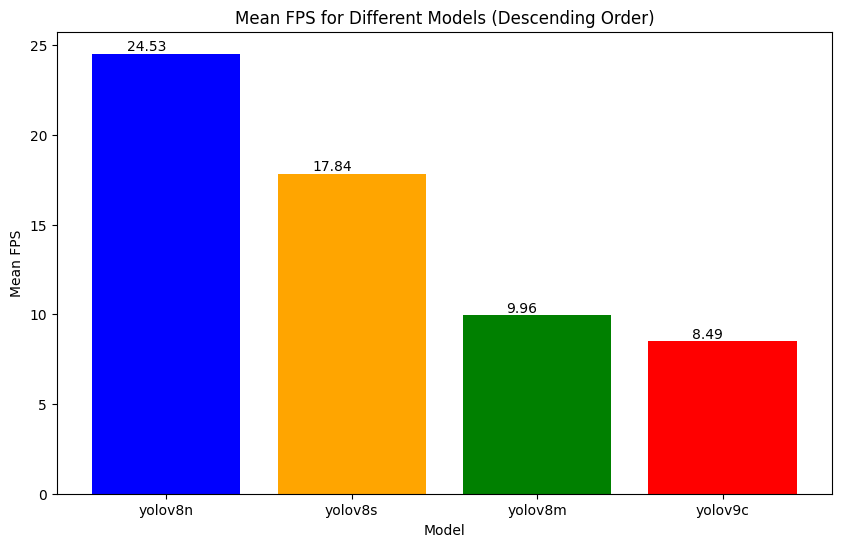

In [13]:
mean_fps = {
    'yolov8n': merged_data['fps_yolov8n'].mean(),
    'yolov8m': merged_data['fps_yolov8m'].mean(),
    'yolov8s': merged_data['fps_yolov8s'].mean(),
    'yolov9c': merged_data['fps_yolov9c'].mean(),
    # 'rtdetrl': merged_data['fps_rtdetrl'].mean()
}

# Sort mean FPS values in descending order
sorted_mean_fps = dict(sorted(mean_fps.items(), key=lambda item: item[1], reverse=True))

# Plot the mean FPS values
plt.figure(figsize=(10, 6))
plt.bar(sorted_mean_fps.keys(), sorted_mean_fps.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Mean FPS for Different Models (Descending Order)')
plt.xlabel('Model')
plt.ylabel('Mean FPS')
for xi, yi in zip(sorted_mean_fps.keys(), sorted_mean_fps.values()):
    plt.text(xi, yi, f'{yi:.2f}', ha='right', va='bottom')
plt.show()

# Latency

In [14]:
file = 'latency'
yolov8n = pd.read_csv(f'{folder}/{file}_yolov8n.pt_tensorrt.csv', header=None)
yolov8m = pd.read_csv(f'{folder}/{file}_yolov8m.pt_tensorrt.csv', header=None)
yolov8s = pd.read_csv(f'{folder}/{file}_yolov8s.pt_tensorrt.csv', header=None)
yolov9c = pd.read_csv(f'{folder}/{file}_yolov9c.pt_tensorrt.csv', header=None)
# rtdetrl = pd.read_csv(f'{folder}/{file}_rtdetr-l.pt.csv', header=None)

In [15]:
yolov9c.iloc[0, 0]

782.9815673828125

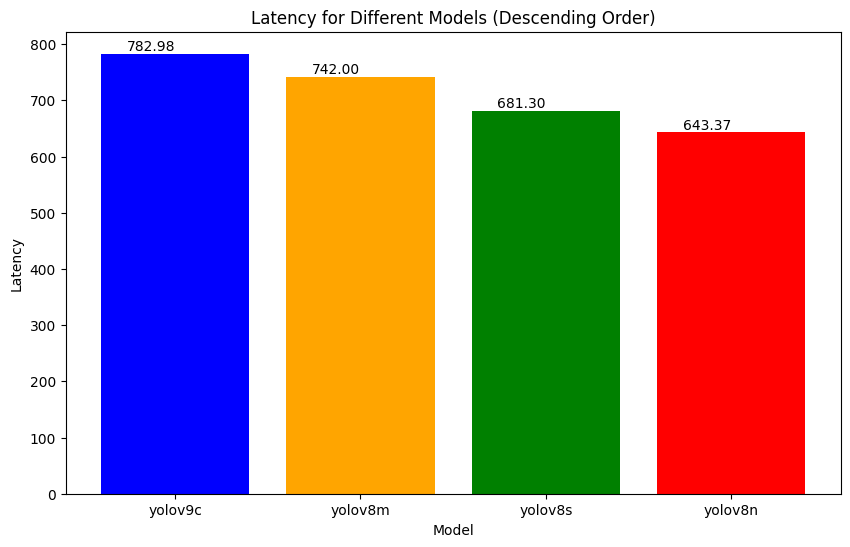

In [16]:
latency = {
    'yolov8n': yolov8n.iloc[0,0],
    'yolov8m': yolov8m.iloc[0,0],
    'yolov8s': yolov8s.iloc[0,0],
    'yolov9c': yolov9c.iloc[0,0],
    # 'rtdetrl': rtdetrl.iloc[0,0]
}

# Sort mean FPS values in descending order
sorted_latency = dict(sorted(latency.items(), key=lambda item: item[1], reverse=True))

# Plot the mean FPS values
plt.figure(figsize=(10, 6))
plt.bar(sorted_latency.keys(), sorted_latency.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Latency for Different Models (Descending Order)')
plt.xlabel('Model')
plt.ylabel('Latency')
# Add numbers on the plot
for xi, yi in zip(sorted_latency.keys(), sorted_latency.values()):
    plt.text(xi, yi, f'{yi:.2f}', ha='right', va='bottom')
plt.show()